## HW P03 - Applying Logistic Regression

In this assignment, you will apply the logistic regression classifier that you have implemented. Assume that a lending agency is interested in creating a predictive model to generate predictions about whether or not a loan applicant will be approved, based on certain pieces of personal information. 

After implementing your logistic regression classifier, place this notebook in the same directory as your `LogisticRegression.py` script, and then run the following cell.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LogisticRegression import LogisticRegression

The data for this assignment is stored in the file `loan_data.text`. Place that file in the same directory as this notebook, and then execute the following cell, which loads the data into a pandas dataframe. A description of the columns in that dataframe is as follows:

* **`age`**: The age of the applicant.
* **`credit`**: The applicant's credit score. 
* **`debt`**: The amount of debt the applicant currently has, in thousands of dollars. 
* **`savings`**: The amount the applicant currently has saved, in thousands of dollars. 
* **`result`**: The result of the loan application. This column contains our labels. 

In [30]:
loan_df = pd.read_table('loan_data.txt', sep='\t')
loan_df.head(n=10)

,age,credit,debt,savings,result
0,42.0,670.0,11.243,4.712,Denied
1,53.0,670.0,11.979,4.457,Denied
2,33.0,723.0,11.023,13.291,Denied
3,25.0,669.0,11.903,7.195,Loan Approved
4,29.0,735.0,6.989,7.919,Loan Approved
5,26.0,642.0,5.868,12.064,Loan Approved
6,50.0,621.0,6.616,3.656,Loan Approved
7,36.0,790.0,3.058,3.292,Loan Approved
8,54.0,698.0,10.025,7.221,Loan Approved
9,30.0,758.0,7.541,12.228,Loan Approved


In the cell below, use `iloc` to create two dataframes, `X` and `y`, which contain the features and labels of the data, respectively. Print the shapes of these two dataframes. 

In [65]:
# Create dataframes X and y
X = loan_df.iloc[:,:4]
# Print shapes of X and y
y = loan_df.iloc[:,4]
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


The code below splits the dataset into training and test sets. 

In [59]:
np.random.seed(1)
n = len(y)
index = np.random.choice(range(n), n, replace=False)
X_shuffled = X.iloc[index,:]
y_shuffled = y.iloc[index]

k = int(0.7*n)

X_train = X_shuffled.iloc[:k,:]
X_test = X_shuffled.iloc[k:,:]
y_train = y_shuffled.iloc[:k]
y_test = y_shuffled.iloc[k:]

In the cell below, create a logistic regression model using the training data. Store the model in `mod`. Generate a summary of the model.

In [60]:
# Train a logistic regression model.
mod = LogisticRegression(X_train,y_train)
# Generate a summary of the model.
mod.summary()

+----------------------------+
|Logistic Regression Summary |
+----------------------------+
Number of training observations: 939
Coefficient Estimates: [-3.06323961  0.02486594  0.00595246 -0.3684602   0.2309801 ]
Log-Likelihood: -424.382098293
Accuracy: 0.784877529286

Class 0: Denied
Class 1: Loan Approved



Use the `score()` method of your model to print the training accuracy and testing accuracy for your model. Include text in your output to indicate which score is which. 

In [68]:
# Print training accuray.
print(mod.accuracy)
# Print testing accuray.
print(mod.score(X_test,y_test))

0.784877529286
0.759305210918


Consider an applicant with the following characteristics: `age=35, credit=620, debt=10, savings=8`. Use your model to generate a prediction as to whether or not this individual will be approved for a loan. Print the predicted outcome 'Denied' or 'Loan Appoved', as well as the estimated probability that the loan will be approved. 

In [80]:
# Print predicted outcome.
print(mod.predict([[35,620,10,8]]))
# Print estimated probability of approval.
print(mod.predict_proba([[35,620,10,8]]))

['Denied']
[ 0.41601186]


Use your model to generate a confusion matrix based on the testing data. 

In [82]:
# Display confusion matrix for testing data.
mod.confusion_matrix(X_test,y_test)

        Pred_0  Pred_1
True_0     233     118
True_1      84     504



The cell below explores the effect that the threshold `t` has on precision and recall. Complete the code in this cell by replacing the blank lines with the appropriate expressions. 

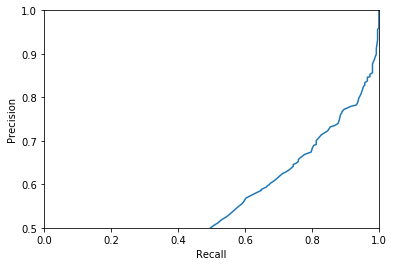

In [92]:
p_list = []
r_list = []

for i in range(0,100):
    y_pred = mod.predict(X_test, t = i/100)
    
    TP = np.sum((y_test == mod.classes[1]) & (y_pred == mod.classes[1]))
    FP = np.sum((y_test == mod.classes[1]) & (y_pred == mod.classes[0]))
    FN = np.sum((y_test == mod.classes[0]) & (y_pred == mod.classes[0]))
    
    precision = TP/(TP+FN)
    recall = TP/(TP+FP)
    p_list.append(precision)
    r_list.append(recall)
plt.close()
plt.plot(r_list, p_list)
plt.xlim([0,1])
plt.ylim([0.5,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()    

When the model has high recall, then it predicts "Loan Approved" for nearly everyone for whom the loan should be approved. However, the model will also likely predict approval for many people that should otherwise be denied. 

When the model has high precision, then nearly everyone who is predicted to be approved, should be approved. However, there will likely be several people who should be approved, but were turned down by the model. 

Do you believe that the lending agency would prefer to see higher precision or higher recall in this model? Provide your answer, with a **brief** explanation in the markdown cell below. 

Higher precision is better because the company needs to make sure that the loan will make profit, more specifically it will not generate a loss for the company